# Kaggle深層学習

pytorchでMNIST分類を実施する

In [22]:
# ライブラリのインポート
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms

from sklearn.datasets import load_digits

In [23]:
digits = load_digits()
X = digits.data
y = digits.target

print(X.shape, y.shape)

(1797, 64) (1797,)


In [24]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

In [26]:
from torch import nn, optim

# 64の説明変数を10個の分類に用いる
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10),
)
model.train()

# 損失関数 - 交差エントロピー、最適化関数 - SGD
lossfun = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [27]:
#学習
losses = []
epochs = range(200)

for ep in epochs:
    optimizer.zero_grad()
    out = model(X)
    
    #損失係数をもとに逆伝播
    loss = lossfun(out, y)
    loss.backward()
    
    optimizer.step()
    losses.append(loss.item())

In [28]:
#モデルで未知のデータを予測
_, pred = torch.max(out, 1)

print("正解率：")
print((pred==y).sum().item() / len(y))

正解率：
0.8759042849193099


Text(0.5, 0, 'losses')

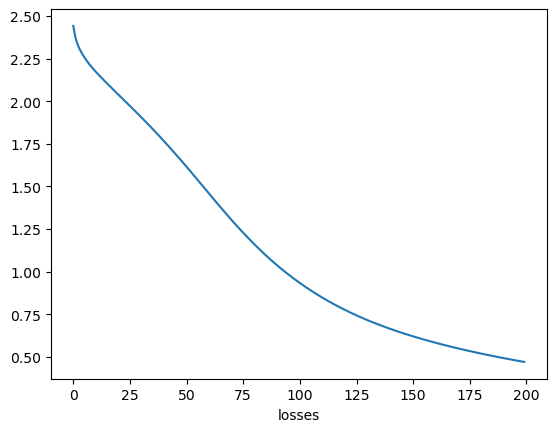

In [29]:
# 損失係数を描写
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("epoch")
plt.xlabel("losses")

In [30]:
ここまで実行

NameError: name 'ここまで実行' is not defined

# ミニバッチ処理による学習
データを逐次的に学習するミニバッチを用いると、過学習の抑止などに効果がある。

In [1]:
# ライブラリのインポート
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

print(X.shape, y.shape)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

#データセットをバッチ化する
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=64, shuffle=False)

(1797, 64) (1797,)


In [3]:
#バッチ化したデータセットでモデルを学習させる
def train_1epoch(model, train_loader, lossfun, optimizer, device):
    model.train()
    total_loss, total_acc = 0.0, 0.0
    for X, y in tqdm(train_loader):
        x = x.to(device)
        y = y.to(device)
        
        #最適化→損失係数をなるべく低くする
        optimizer.zero_grad()
        
        #yの予測値を算出
        out = model(x)
        
        #損失係数の計算
        loss = lossfun(out, y)
        
        #逆伝播
        loss.backward()
        
        #勾配を更新
        optimizer.step()
        
        # ミニバッチ全体での損失係数を計算 → バッチを学習し終わったとこで更新する
        total_loss += total.item() * x.size(0)
        
        # ミニバッチごとの正答率を算出
        _, pred = torch.max(out, 1)
        total_acc += torch.sum(pred==y.data)
    
    avg_loss = total_loss /len(train_loader.dataset)
    avg_acc = total_acc /len(train_loader.dataset)
    
    return avg_acc, avg_loss
    

In [4]:
#モデルで未知のデータを予測
_, pred = torch.max(out, 1)

print("正解率：")
print((pred==y).sum().item() / len(y))

NameError: name 'out' is not defined

In [ ]:
## スタージェスの公式

データ数をｎとして、階級数をkとすると次の式：
k=1＋log2n

算術平均＞幾何平均＞調和平均
「原因と結果の経済学」